In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_excel('VI_Dataset.xlsx')

In [5]:
df.head()

,V1,V2,V3,I1,I2,I3,Category
0,-1561.640419,-11300.047492,12861.687911,4.361491,-29.677189,25.315698,0
1,-1945.655809,-14254.110354,16199.766162,8.574606,-5.735847,-2.838758,0
2,-1729.773909,-14452.691710,16182.465619,8.680360,-5.110379,-3.569980,0
3,-1608.518887,-14525.355986,16133.874873,8.688939,-5.044172,-3.644767,0
4,-1487.158235,-14597.497683,16084.655918,8.695347,-4.973464,-3.721883,0


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = DecisionTreeClassifier()

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.drop('Category',axis=1)

In [14]:
y = df['Category']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [16]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
pred = clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,pred)

0.9998521979864818

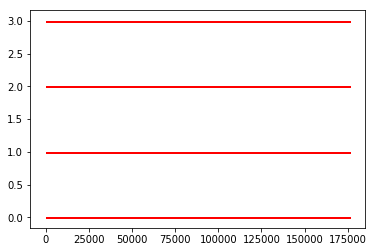

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(range(len(y_test)),pred,s=1,c='b',marker='s',label='real')
ax1.scatter(range(len(y_test)),y_test,s=1,c='r',marker='s',label='real')

In [58]:
y_arr = np.array(y_test)

In [59]:
l = []
for i in range(len(pred)):
    if pred[i] != y_arr[i]:
        l.append(i)
print(l)

[3180, 11381, 24309, 39293, 40976, 42136, 48511, 51727, 71048, 72820, 76835, 77092, 79123, 82554, 85517, 105650, 110035, 111796, 133927, 147104, 147134, 148428, 153391, 165979, 169414, 170385]


In [60]:
a=[]
w=[]
d={}
for x in l:
    a.append(y_arr[x])
    d['actual']=a
    w.append(pred[x])
    d['mislabelled'] = w
print(d)

{'actual': [3, 0, 2, 1, 3, 3, 3, 3, 3, 2, 0, 3, 2, 3, 2, 1, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0], 'mislabelled': [0, 3, 3, 2, 0, 2, 0, 2, 0, 3, 1, 2, 3, 0, 3, 2, 0, 1, 0, 3, 3, 2, 3, 2, 1, 3]}


In [61]:
print(len(l))

26


In [62]:
print(len(pred))

175911
